In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
excel_file = r'C:\Users\user\Desktop\Excel Practice\NEW\Sales Data.xlsx'

sales = pd.read_excel(excel_file)

print("Read sucessfull")

Read sucessfull


In [6]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [7]:
sales.dtypes

Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
Sales                      float64
City                        object
Hour                         int64
dtype: object

In [8]:
sales.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [9]:
#seperating Year and Day from Order Date, Month already exists
sales['Year'] = pd.to_datetime(sales['Order Date']).dt.year
sales['Day'] = pd.to_datetime(sales['Order Date']).dt.day
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Year,Day
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,2019,30
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,2019,29
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,2019,12
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,2019,22
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,2019,18


In [13]:
sales.shape

(185950, 12)

In [14]:
sales.describe()

,Order ID,Quantity Ordered,Price Each,Order Date,Month,Sales,Hour,Year,Day
count,185950.000000,185950.000000,185950.000000,185950,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,2019-07-18 21:54:38.887550464,7.059140,185.490917,14.413305,2019.000183,15.759532
min,141234.000000,1.000000,2.990000,2019-01-01 03:07:00,1.000000,2.990000,0.000000,2019.000000,1.000000
25%,185831.250000,1.000000,11.950000,2019-04-16 21:05:15,4.000000,11.950000,11.000000,2019.000000,8.000000
50%,230367.500000,1.000000,14.950000,2019-07-17 20:40:30,7.000000,14.950000,15.000000,2019.000000,16.000000
75%,275035.750000,1.000000,150.000000,2019-10-26 08:14:00,10.000000,150.000000,19.000000,2019.000000,23.000000
max,319670.000000,9.000000,1700.000000,2020-01-01 05:13:00,12.000000,3400.000000,23.000000,2020.000000,31.000000
std,51512.737110,0.442793,332.731330,NaN,3.502996,332.919771,5.423416,0.013521,8.782176


In [10]:
# Counting number of distinct products
distinct_products_count = sales['Product'].nunique()
print("Number of distinct products:", distinct_products_count)

Number of distinct products: 19


In [11]:
# Calculating amount of total sales
total_sales = sales['Sales'].sum()
print("Total sales:",total_sales)

Total sales: 34492035.97


In [15]:
# Calculating sales by product
sales_by_product = sales.groupby('Product')['Sales'].sum()
print("Sales by product:\n", sales_by_product)

Sales by product:
 Product
20in Monitor                   454148.71
27in 4K Gaming Monitor        2435097.56
27in FHD Monitor              1132424.50
34in Ultrawide Monitor        2355558.01
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Apple Airpods Headphones      2349150.00
Bose SoundSport Headphones    1345565.43
Flatscreen TV                 1445700.00
Google Phone                  3319200.00
LG Dryer                       387600.00
LG Washing Machine             399600.00
Lightning Charging Cable       347094.15
Macbook Pro Laptop            8037600.00
ThinkPad Laptop               4129958.70
USB-C Charging Cable           286501.25
Vareebadd Phone                827200.00
Wired Headphones               246478.43
iPhone                        4794300.00
Name: Sales, dtype: float64


In [16]:
# Calculating average sales per month
avg_sales_per_month = sales.groupby(['Year', 'Month'])['Sales'].mean()
print("Average sales per month:\n", avg_sales_per_month)

Average sales per month:
 Year  Month
2019  1        187.450795
      2        183.884962
      3        185.250471
      4        185.495390
      5        190.305852
      6        190.187565
      7        185.249826
      8        187.648849
      9        180.497387
      10       184.238580
      11       182.074956
      12       184.655913
2020  1        255.008529
Name: Sales, dtype: float64


In [17]:
# Calculating sales by city
sales_by_city = sales.groupby('City')['Sales'].sum()
print("Sales by city:\n", sales_by_city)

Sales by city:
 City
 Atlanta          2795498.58
 Austin           1819581.75
 Boston           3661642.01
 Dallas           2767975.40
 Los Angeles      5452570.80
 New York City    4664317.43
 Portland         2320490.61
 San Francisco    8262203.91
 Seattle          2747755.48
Name: Sales, dtype: float64


In [18]:
# Finding the top selling products
top_selling_products = sales['Product'].value_counts().head()
print("Top selling products:\n", top_selling_products)

Top selling products:
 Product
USB-C Charging Cable        21903
Lightning Charging Cable    21658
AAA Batteries (4-pack)      20641
AA Batteries (4-pack)       20577
Wired Headphones            18882
Name: count, dtype: int64


In [19]:
# Finding the least selling products
least_selling_products = sales['Product'].value_counts().tail()
print("Least selling products:\n", least_selling_products)

Least selling products:
 Product
ThinkPad Laptop       4128
20in Monitor          4101
Vareebadd Phone       2065
LG Washing Machine     666
LG Dryer               646
Name: count, dtype: int64


In [20]:
# Grouping by hour and counting orders
orders_by_hour = sales.groupby('Hour')['Order ID'].count()

# Finding the hour with the most orders
most_orders_hour = orders_by_hour.idxmax()
print("The most orders occur at hour:", most_orders_hour)

The most orders occur at hour: 19


In [21]:
# Calculating the correlation between Quantity Ordered and Price Each
correlation = sales['Quantity Ordered'].corr(sales['Price Each'])
print("Correlation between Quantity Ordered and Price Each:", correlation)

Correlation between Quantity Ordered and Price Each: -0.1482723403455149


The correlation value of approximately -0.15 suggests a weak negative relationship between the quantity of a product ordered and its price, meaning that changes in the quantity ordered don't strongly dictate changes in the price of each item.

In [22]:
# Finding frequently co-purchased products using Order ID as a transaction identifier
co_purchased = sales.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
co_purchased_products = co_purchased[~sales.duplicated(subset=['Order ID'])]

# Displaying the most common combinations
from collections import Counter

common_combinations = Counter(co_purchased_products)
print("Most common co-purchased products:", common_combinations.most_common(5))


Most common co-purchased products: [('Lightning Charging Cable', 19831), ('AAA Batteries (4-pack)', 19826), ('AA Batteries (4-pack)', 19809), ('USB-C Charging Cable', 19792), ('Wired Headphones', 17208)]


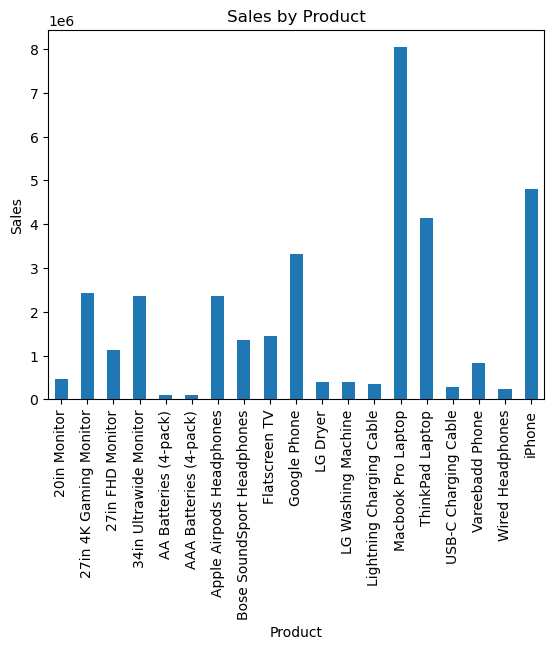

In [23]:
# Plotting sales by product
sales_by_product.plot(kind='bar')
plt.title('Sales by Product')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.show()

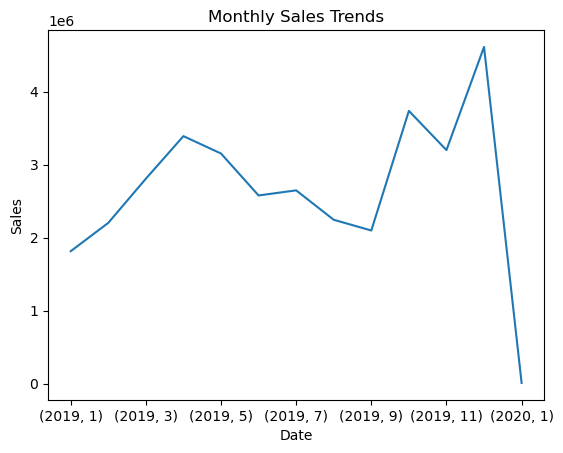

In [28]:
# Plot monthly sales trends
monthly_sales = sales.groupby(['Year', 'Month'])['Sales'].sum()
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

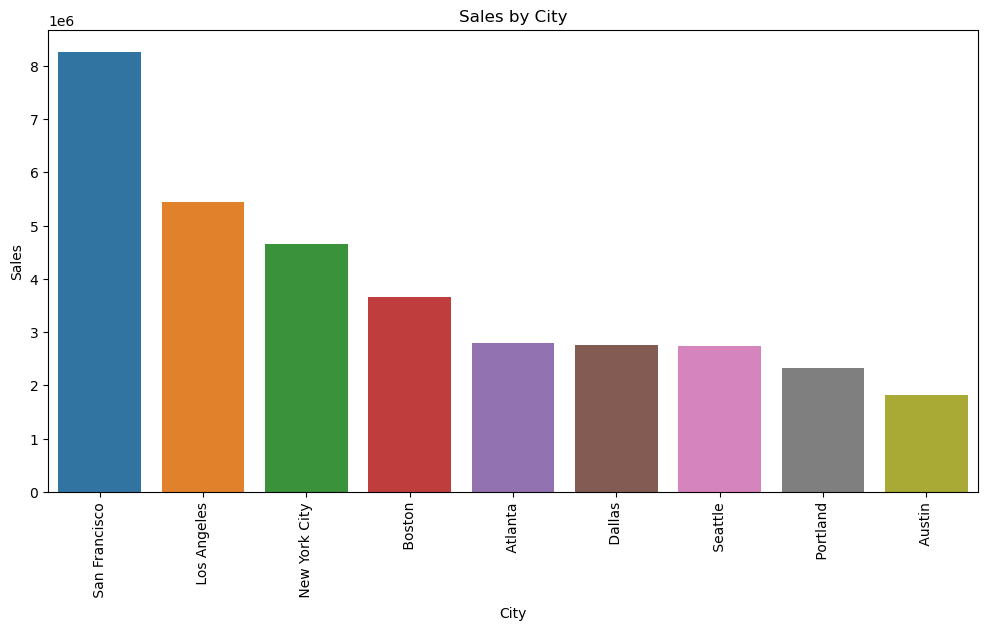

In [29]:
# Plot sales by city
sales_by_city = sales.groupby('City')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_city.index, y=sales_by_city.values)
plt.title('Sales by City')
plt.xlabel('City')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

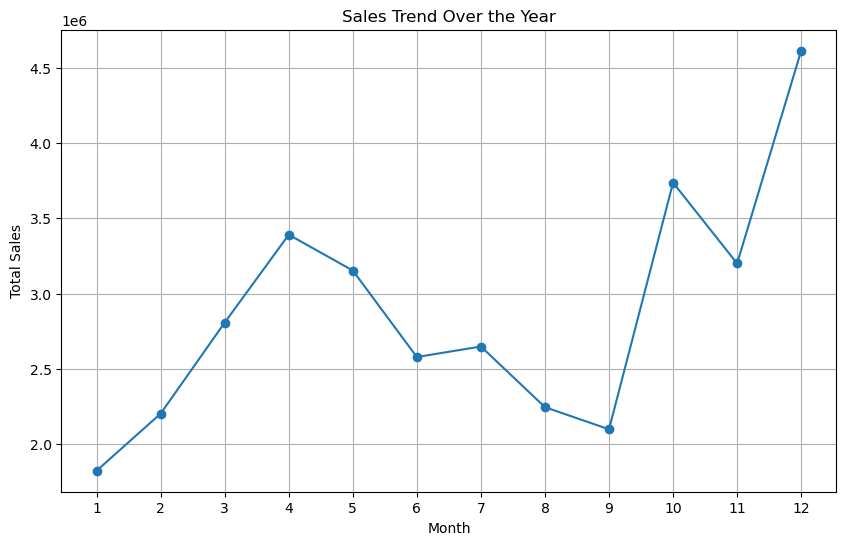

In [30]:
# Grouping by month and summing up the sales
monthly_sales = sales.groupby('Month')['Sales'].sum()

# Visualizing the sales trend over the year
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Sales Trend Over the Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(monthly_sales.index)
plt.grid(True)
plt.show()